Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
!pip install kaggle

In [5]:
# Make sure you have uploaded your kaggle.json file to ~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
License(s): unknown
  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 135MB/s]


After downloading, the dataset will be in a zip file. You'll need to unzip it to access the CSV file.

In [7]:
import zipfile
import os

# Define the path to the downloaded zip file and the extraction directory
zip_file_path = '/content/gold-price-data.zip'  # Replace with the actual path if different
extraction_path = '/content/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Dataset extracted to: {extraction_path}")

Dataset extracted to: /content/


In [8]:
#Loading CSV data to Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [9]:
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [12]:
# getting some basic information of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [14]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [16]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

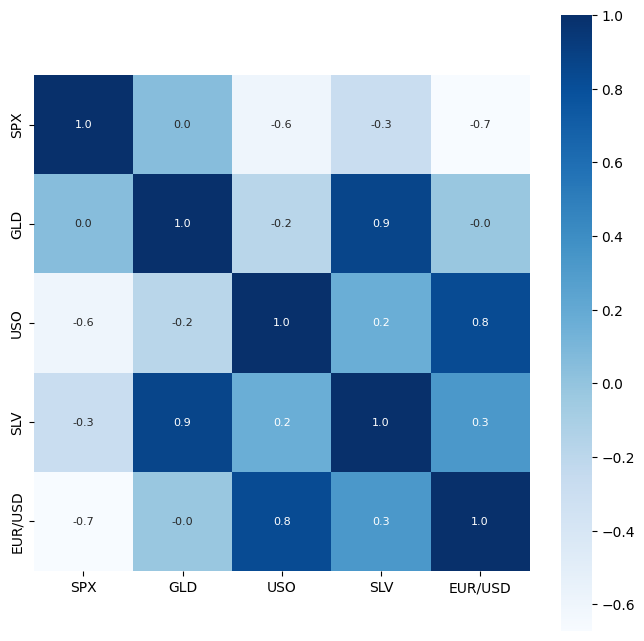

In [20]:
# Constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [21]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

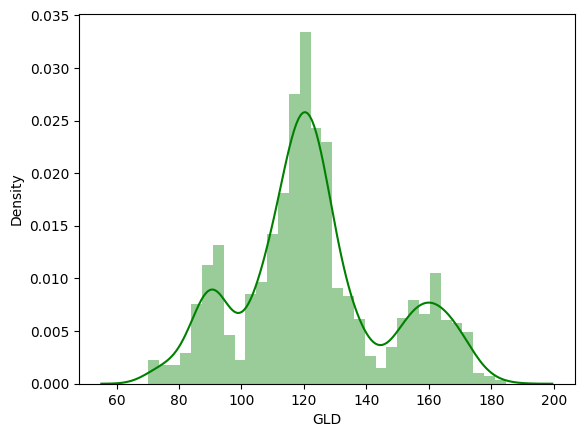

In [22]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [23]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [24]:
gold_data.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491


In [25]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [26]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


Splitting into Training data and Test Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training : Random Forest Model

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
#training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [30]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [31]:
test_data_prediction

array([168.53009952,  81.99389987, 116.26780036, 127.74540088,
       120.9893008 , 154.6864975 , 150.22979807, 125.99180034,
       117.48859883, 125.89540123, 116.79140054, 171.5689006 ,
       141.6677982 , 168.00079861, 115.15060002, 117.80650072,
       140.71170273, 170.25960121, 158.94240257, 158.52439914,
       155.20170071, 125.12980064, 176.45039944, 157.12690354,
       125.3708004 ,  93.76149979,  77.18420022, 120.70910015,
       118.98859892, 167.52060041,  88.03350022, 125.44470038,
        91.3342007 , 117.64889995, 121.18449919, 136.17020086,
       115.87460088, 114.97520069, 147.80230078, 107.16340097,
       103.9569023 ,  87.17379794, 126.47970029, 118.08759961,
       152.43509844, 119.47000011, 108.50889961, 108.22849836,
        93.22220066, 127.13979813,  75.56870024, 113.63759911,
       121.48799986, 111.45619946, 118.71569864, 120.5453997 ,
       159.3721992 , 167.98560091, 146.89739699,  85.87299856,
        94.13820065,  86.83969855,  90.4663    , 119.06

In [32]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error : ", error_score)


R Squared error :  0.9891911370246765


Compare the Actual Values and Predicted Values in a Plot

In [33]:
y_test = list(y_test)

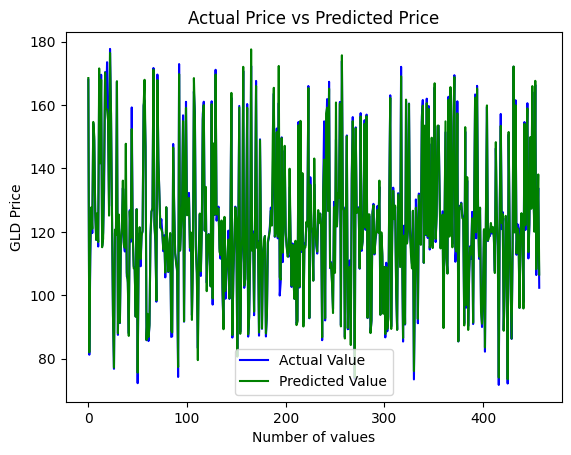

In [34]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

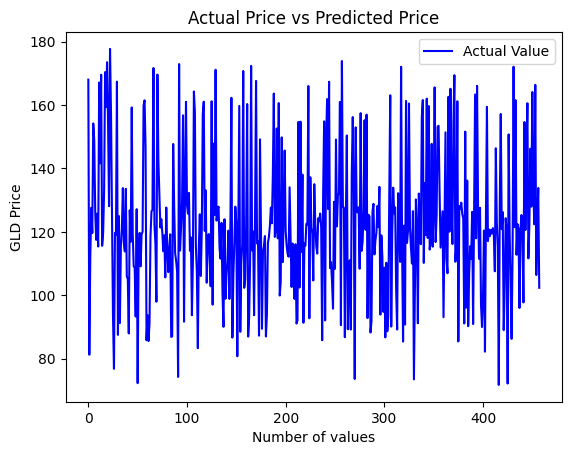

In [35]:
plt.plot(y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()